# DATA EXPLORATION
# Load & Preview the CSVs

In [251]:
# Import the pandas library for data manipulation and analysis
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets from CSV files into pandas DataFrames
# 'users' DataFrame contains user-related information
users = pd.read_csv("USER_TAKEHOME.csv")

# 'transactions' DataFrame contains transactional data, including purchases and receipts
transactions = pd.read_csv("TRANSACTION_TAKEHOME.csv")

# 'products' DataFrame contains product-related information such as brand and category
products = pd.read_csv("PRODUCTS_TAKEHOME.csv")



In [227]:
# Display the first five rows of the 'users' DataFrame to get an overview of the user-related data
users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [228]:
# Display the first five rows of the 'transactions' DataFrame to inspect the structure and contents of transaction records
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,8/21/2024,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,7/20/2024,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,8/18/2024,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1,
3,000239aa-3478-453d-801e-66a82e39c8af,6/18/2024,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,7/4/2024,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1,


In [229]:
# Display the first five rows of the 'products' DataFrame to check the available product-related information
products.head()


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [230]:
# checking the volume of transaction records and associated attributes
print("Transactions dimension: \n",transactions.shape)

# checking the number of users and available user-related features
print("Users dimension: \n",users.shape)

# checking how many product records and attributes are available
print("Products dimension: \n",products.shape)

Transactions dimension: 
 (50000, 8)
Users dimension: 
 (100000, 6)
Products dimension: 
 (845552, 7)


In [231]:
# Extract the unique user IDs from both tables
users_list = set(users['ID'].dropna().astype(str))
transactions_list = set(transactions['USER_ID'].dropna().astype(str))

# Find user IDs in transactions but not in users, meaning that this is not a complete set of user's data.
missing_users = transactions_list - users_list

# Convert to DataFrame and display
missing_users_df = pd.DataFrame(list(missing_users), columns=["user_id"])
missing_users_df

,user_id
0,637c3b56ae4fd936d3deaa42
1,63ec24f918d26a8e6a5e1b66
2,6359d349a831665187ce6f27
3,5e10ff93fa890112095f9390
4,6372a0015fdbb03aa198ebcd
...,...
17598,619158de07acef7276e38856
17599,61e9699cd88a8533ec0f0d6d
17600,5fbab34cd7e73c26b276c415
17601,62c5f6bdb79924d29cc044ab


In [232]:
# Display summary information about the 'transactions' DataFrame
# Includes number of entries, column names, data types, and missing values
transactions.info()

# Display summary information about the 'users' DataFrame
# Helps identify data types, missing values, and memory usage
users.info()

# Display summary information about the 'products' DataFrame
# Useful for understanding the structure of product-related data
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      6949

<!-- Check for Data Quality Issues -->
<!-- Check Missing values for products, users and transactions  -->
users.isnull().sum()
Duplicates: df.duplicated().sum()
Data types: df.info()
Inconsistent values (e.g., date formats, categories)

In [233]:
# Check Missing values for products, users and transactions
print("Users missing values: \n",users.isnull().sum())
print("Transactions missing values: \n",transactions.isnull().sum())
print("Products missing values: \n",products.isnull().sum())

Users missing values: 
 ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64
Transactions missing values: 
 RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64
Products missing values: 
 CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


In [167]:
# Missing values in BIRTH_DATE column is less that 5%.
# Missing values in STATE  column is less that 5%.
# Missing values in Language column is 30%.

In [234]:
print("Duplicated user records:\n", users.duplicated().sum())
print("Duplicated product records:\n", products.duplicated().sum())
print("Duplicated transactions records:\n", transactions.duplicated().sum())

Duplicated user records:
 0
Duplicated product records:
 215
Duplicated transactions records:
 171


In [235]:
users["LANGUAGE"].value_counts()

,count
LANGUAGE,
en,63403
es-419,6089


In [236]:
# Language column has "en" which is English	Generic, used for English-speaking users worldwide
# 'es-419' is used for Used for Spanish speakers in Latin America & the Caribbean, can be used for localization and personalization for different users.

In [252]:
import pandas as pd
#Understanding if the data is mising completely at random, missing at random or missing not at random.
# Count missing LANGUAGE values by STATE
print("Missing LANGUAGE by STATE:")
print(users[users["LANGUAGE"].isnull()].groupby("STATE")["LANGUAGE"].size().sort_values(ascending=False).head(7))
# TX    0.094844
# FL    0.188564
# CA    0.278796
# NY    0.338709
# IL    0.378567
# GA    0.417626
# PA    0.455908
# OH    0.492877 same as the the top users state list, could be chance or related.

# Count missing LANGUAGE values by GENDER
print("\nMissing LANGUAGE by GENDER:")
print(users[users["LANGUAGE"].isnull()].groupby("GENDER")["LANGUAGE"].size().sort_values(ascending=False))

# Count missing LANGUAGE values by BIRTH_DATE (checking missing birth dates too)
print("\nMissing LANGUAGE by BIRTH_DATE (Missing vs. Present):")
print(users.groupby(users["BIRTH_DATE"].isnull())["LANGUAGE"].apply(lambda x: x.isnull().sum()))


Missing LANGUAGE by STATE:
STATE
CA    3010
TX    2846
FL    2220
NY    1568
GA    1055
IL    1038
NC     943
Name: LANGUAGE, dtype: int64

Missing LANGUAGE by GENDER:
GENDER
female                    17056
male                       9990
transgender                1192
unknown                     145
prefer_not_to_say           122
non_binary                   57
not_listed                   27
not_specified                20
Non-Binary                   15
My gender isn't listed        2
Prefer not to say             1
Name: LANGUAGE, dtype: int64

Missing LANGUAGE by BIRTH_DATE (Missing vs. Present):
BIRTH_DATE
False    30476
True        32
Name: LANGUAGE, dtype: int64


In [238]:
# Data in Languages is missing at random so it could be impututed with the mode in future analysis.
# State missing values is missing completely at random so we drop the missing values in future analysis

In [239]:
# Filter rows where BIRTH_DATE is missing
missing_birthdate = users[users['BIRTH_DATE'].isnull()]

# Count how many of those rows also have missing GENDER
missing_gender_count = missing_birthdate['GENDER'].isnull().sum()

# Count total missing BIRTH_DATE entries
total_missing_birthdate = missing_birthdate.shape[0]

# Calculate the proportion of missing GENDER among missing BIRTH_DATE rows
proportion_missing_gender = missing_gender_count / total_missing_birthdate

# Print results
print(f"Total missing BIRTH_DATE: {total_missing_birthdate}")
print(f"Missing GENDER where BIRTH_DATE is missing: {missing_gender_count}")
print(f"Proportion of missing GENDER among missing BIRTH_DATE: {proportion_missing_gender:.2%}")


Total missing BIRTH_DATE: 3675
Missing GENDER where BIRTH_DATE is missing: 3601
Proportion of missing GENDER among missing BIRTH_DATE: 97.99%


In [ ]:
# There's a strong relationship between Birthrate and Gender missing data, further investigation needs to be done.
# Most females don't provide their date of birth.


In [240]:
# Understanding which states have most users
top5_states = users["STATE"].value_counts()
top5_states.head(5)
# Most users are from Texas, Florida, California, New York. This is Fetch's geographical fanbase.

,count
STATE,
TX,9028
FL,8921
CA,8589
NY,5703
IL,3794


In [196]:
import pandas as pd
# Which states make 80 percent of our user base?
# Get state counts
state_counts = users["STATE"].value_counts()

# Calculate cumulative percentage
state_cumsum = state_counts.cumsum() / state_counts.sum()

# Filter states contributing to 80% of users
top_states = state_cumsum[state_cumsum <= 0.80]

print(top_states.head(5))


STATE
TX    0.094844
FL    0.188564
CA    0.278796
NY    0.338709
IL    0.378567
Name: count, dtype: float64


In [241]:
users["GENDER"].value_counts()
# Different versions of similar labels exist, e.g., "non_binary" vs. "Non-Binary", "prefer_not_to_say" vs. "Prefer not to say".
# Standardizing gender categories (e.g., merging variations) improves data quality.
# We need to merge some of the gender qualities because they mean kinda the same thing
# prefer_not_to_say 1317 and Prefer not to say 1 = same thing
# non_binary 464 and Non-Binary 33  = same thing
# not_listed 176  not_specified 25 My gender isn't listed 5

,count
GENDER,
female,64240
male,25829
transgender,1772
prefer_not_to_say,1350
non_binary,473
unknown,196
not_listed,180
Non-Binary,34
not_specified,28


In [242]:
# Convert Date Columns (CREATED_DATE, BIRTH_DATE) to datetime format for accurate time-based analysis.
users["CREATED_DATE"] = pd.to_datetime(users["CREATED_DATE"], errors="coerce")
users["BIRTH_DATE"] = pd.to_datetime(users["BIRTH_DATE"], errors="coerce")

In [243]:
# Create a new column named age
# Get today's date
today = datetime.today()

# Compute Age
users["AGE"] = users["BIRTH_DATE"].apply(
    lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)) if pd.notnull(x) else None
)


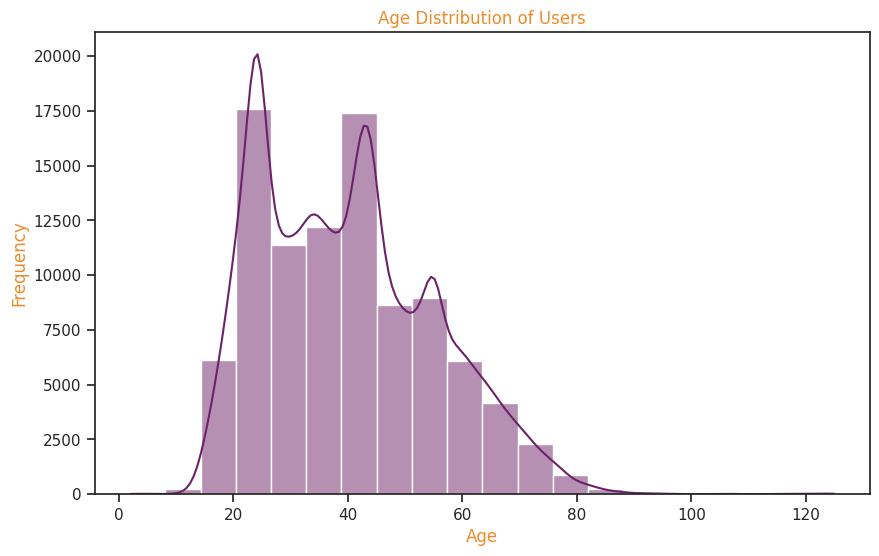

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop NaN values in AGE column for visualization
age_data = users["AGE"].dropna()

# Create a histogram to visualize age distribution
plt.figure(figsize=(10, 6))
sns.histplot(age_data, bins=20, kde=True, color="#6c2268")

# Set labels and title
plt.xlabel("Age", color="#ee8a28")
plt.ylabel("Frequency", color="#ee8a28")
plt.title("Age Distribution of Users", color="#ee8a28")

# Show the plot
plt.show()
# We have outlier ages - 113, 6.0, 101, 122.0, 117.0


In [69]:
# The distribution is right-skewed, meaning there are more younger users than older ones.
# There are multiple peaks, suggesting distinct age groups in the data.

# Peak Age Groups:
# There is a significant concentration of users in the 20-30 and 40-50 age ranges.
# Another smaller peak appears around 60+, indicating a smaller but notable presence of older users.

# Some users appear to have extreme ages (e.g., above 100), which could indicate data entry errors or unusual cases.

# Diversity of Users:The spread of ages suggests a broad range of users from young adults to older individuals.



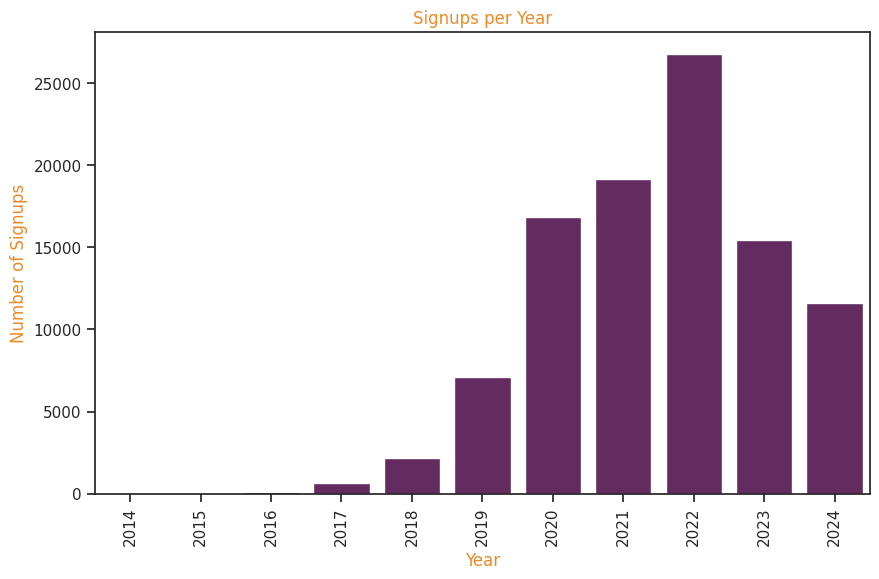

In [179]:
# Plot  barchat  signups per year
# Extract the year from the CREATED_DATE column
users['signup_year'] = users['CREATED_DATE'].dt.year

# Group by signup year and count the number of signups
signups_per_year = users.groupby('signup_year')['ID'].count()

# Create the bar chart
plt.figure(figsize=(10, 6))
signups_per_year.plot(kind='bar')
sns.barplot(x=signups_per_year.index, y=signups_per_year.values,color="#6c2268",legend=False)
plt.xlabel("Year", color="#ee8a28")
plt.ylabel("Number of Signups", color="#ee8a28")
plt.title("Signups per Year",color="#ee8a28")
plt.show()


In [ ]:
# The number of signups increased steadily from 2017 to 2022.
# The sharpest growth happened between 2019 and 2022, showing high user acquisition during these years.
# 2022 had the highest number of signups
# Signups dropped in 2023 and further in 2024.
# Analyze 2022's success → Identify what drove high signups (ads, referral programs, partnerships).
#  Explore retention strategies → Focus on converting signups into long-term users.
#

<ipython-input-180-7a442ab9a8f6>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  users['YearMonth'] = users['CREATED_DATE'].dt.to_period('M')


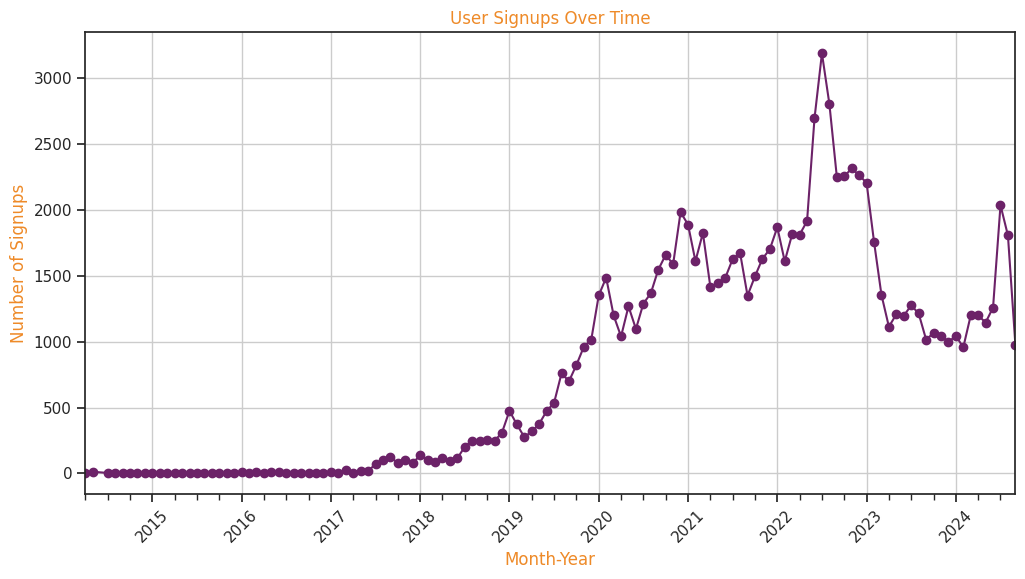

In [180]:
# Plot trend of signups over time
# Group data by year and month
users['YearMonth'] = users['CREATED_DATE'].dt.to_period('M')

# Aggregate the count of users per month
monthly_signups = users.groupby('YearMonth').size()

# Plot the time series
plt.figure(figsize=(12, 6))
monthly_signups.plot(marker='o', linestyle='-', color="#6c2268")

# Formatting
plt.title("User Signups Over Time", color="#ee8a28")
plt.xlabel("Month-Year", color="#ee8a28")
plt.ylabel("Number of Signups", color="#ee8a28")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True)

plt.show()

In [181]:
# Rapid Acceleration (2019 - 2021)
# COVID-19 (2020-2021) might have played a role, increasing digital platform adoption.
# Analyze 2019-2021 Growth: What worked well? Can those strategies be reintroduced?
# Investigate 2022 Decline: Was it due to product changes, marketing reductions, or external factors?
# Boost 2024 Recovery: If the recent spike is from promotions, maintain momentum with continuous engagement strategies.
# Consider Predictive Modeling: Forecast future signup trends based on historical patterns.

In [ ]:
# Understanding transaction columns values
transactions["RECEIPT_ID"].value_counts()

RECEIPT_ID
bedac253-2256-461b-96af-267748e6cecf    12
bc304cd7-8353-4142-ac7f-f3ccec720cb3     8
4ec870d2-c39f-4a40-bf8a-26a079409b20     8
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711     8
760c98da-5174-401f-a203-b839c4d406be     8
                                        ..
56a368e6-d677-459d-ba05-70a886c3126b     2
56a0e14c-187c-43ec-96ab-b67ac5c197f1     2
569f4be9-63d1-4afd-8ed5-d520ce85b878     2
56946262-15b1-41fd-8814-fc544d35fc6c     2
fffe8012-7dcf-4d84-b6c6-feaacab5074a     2
Name: count, Length: 24440, dtype: int64

In [ ]:
#Understanding transaction columns values
transactions["PURCHASE_DATE"].value_counts()

PURCHASE_DATE
2024-06-15    774
2024-07-03    772
2024-07-01    752
2024-08-03    720
2024-07-13    712
             ... 
2024-09-07    428
2024-08-21    422
2024-09-06    394
2024-09-04    390
2024-09-08    282
Name: count, Length: 89, dtype: int64

In [ ]:
# Understanding transaction columns values
print(transactions["STORE_NAME"].value_counts())

STORE_NAME
WALMART                   21326
DOLLAR GENERAL STORE       2748
ALDI                       2640
KROGER                     1494
TARGET                     1484
                          ...  
SPIRITS                       2
LA GLORIA SUPERMERCADO        2
FARM FRESH                    2
ALTA                          2
PLATEAU TRAVEL CENTER         2
Name: count, Length: 954, dtype: int64


In [197]:
# # Understanding transaction columns values
top_store_names = transactions["STORE_NAME"].value_counts()
top_store_names.head(5)


,count
STORE_NAME,
WALMART,21326
DOLLAR GENERAL STORE,2748
ALDI,2640
KROGER,1494
TARGET,1484


In [183]:
# # Understanding transaction columns values
transactions["FINAL_QUANTITY"].unique()

array(['1', 'zero', '2', '3', '4', '4.55', '2.83', '2.34', '0.46', '7',
       '18', '12', '5', '2.17', '0.23', '8', '1.35', '0.09', '2.58',
       '1.47', '16', '0.62', '1.24', '1.4', '0.51', '0.53', '1.69', '6',
       '2.39', '2.6', '10', '0.86', '1.54', '1.88', '2.93', '1.28',
       '0.65', '2.89', '1.44', '2.75', '1.81', '276', '0.87', '2.1',
       '3.33', '2.54', '2.2', '1.93', '1.34', '1.13', '2.19', '0.83',
       '2.61', '0.28', '1.5', '0.97', '0.24', '1.18', '6.22', '1.22',
       '1.23', '2.57', '1.07', '2.11', '0.48', '9', '3.11', '1.08',
       '5.53', '1.89', '0.01', '2.18', '1.99', '0.04', '2.25', '1.37',
       '3.02', '0.35', '0.99', '1.8', '3.24', '0.94', '2.04', '3.69',
       '0.7', '2.52', '2.27'], dtype=object)

In [185]:
print("Duplicated transactions records:\n", transactions.duplicated().sum())
# Each receipt has different items, so it makes sense to have duplicates.

Duplicated transactions records:
 171


In [191]:
# Count the number of duplicate values in a barcode
duplicate_counts = transactions['BARCODE'].duplicated().sum()

print(f"Number of duplicated values in COLUMN_NAME: {duplicate_counts}")

# Multiple customers can purchase the same items.


Number of duplicated values in COLUMN_NAME: 38972


In [198]:
transactions

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,8/21/2024,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,7/20/2024,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,8/18/2024,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1,
3,000239aa-3478-453d-801e-66a82e39c8af,6/18/2024,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,7/4/2024,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1,
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,8/21/2024,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,8/11/2024,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1,2
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,7/11/2024,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,6/18/2024,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1,3


In [253]:
# inspecting users in transaction table
print(transactions["USER_ID"].value_counts().head(5))

USER_ID
64e62de5ca929250373e6cf5    22
604278958fe03212b47e657b    20
62925c1be942f00613f7365e    20
64063c8880552327897186a5    18
61d5f5d2c4525a3a478b386b    14
Name: count, dtype: int64


In [200]:
products

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
...,...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11
845548,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10
845549,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11
845550,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10


In [201]:
# Understanding products
products.isnull().sum()

,0
CATEGORY_1,111
CATEGORY_2,1424
CATEGORY_3,60566
CATEGORY_4,778093
MANUFACTURER,226474
BRAND,226472
BARCODE,4025


In [204]:
# Understanding product categories
category_1 = products["CATEGORY_1"].value_counts()
category_1.head(5)

,count
CATEGORY_1,
Health & Wellness,512695
Snacks,324817
Beverages,3990
Pantry,871
Apparel & Accessories,846


In [206]:
# Understanding product categories
category_2 = products["CATEGORY_2"].value_counts()
print(category_2.head(5))

CATEGORY_2
Candy                     121036
Hair Care                 111482
Medicines & Treatments     99118
Bath & Body                81469
Skin Care                  62587
Name: count, dtype: int64


In [207]:
# Understanding product categories
print(products["CATEGORY_2"].value_counts().head(5))


CATEGORY_2
Candy                     121036
Hair Care                 111482
Medicines & Treatments     99118
Bath & Body                81469
Skin Care                  62587
Name: count, dtype: int64


In [208]:
# Understanding product categories
print(products["CATEGORY_3"].value_counts().head(5))

CATEGORY_3
Confection Candy                 56965
Vitamins & Herbal Supplements    55700
Chocolate Candy                  47710
Hair Styling Products            20450
Reading Glasses                  20394
Name: count, dtype: int64


In [209]:
# Understanding product categories
print(products["CATEGORY_3"].value_counts().head(5))


CATEGORY_3
Confection Candy                 56965
Vitamins & Herbal Supplements    55700
Chocolate Candy                  47710
Hair Styling Products            20450
Reading Glasses                  20394
Name: count, dtype: int64


In [210]:
# Understanding product categories
print(products["CATEGORY_4"].value_counts().head(5))

CATEGORY_4
Lip Balms                      9737
Already Popped Popcorn         6974
Sleep Aids                     4978
Hair Brushes & Combs           4724
Women's Shaving Gel & Cream    3874
Name: count, dtype: int64


In [211]:

# Understanding product manufacturers
print(products["MANUFACTURER"].value_counts().head(5))


MANUFACTURER
PLACEHOLDER MANUFACTURER    86902
PROCTER & GAMBLE            21065
REM MANUFACTURER            20813
UNILEVER                    16864
L'OREAL                     16699
Name: count, dtype: int64


In [212]:
# Understanding product brands
print(products["BRAND"].value_counts().head(10))
# Some brand

BRAND
REM BRAND          20813
BRAND NOT KNOWN    17025
PRIVATE LABEL      13467
CVS                 6400
SEGO                4831
MEIJER              4050
DOVE                3857
RITE AID            3238
MATRIX              2958
EQUATE              2946
Name: count, dtype: int64


In [246]:
# Merge the data sets
# Merging Transactions and Users datasets on user_id
merge_users_transactions = pd.merge(transactions, users, left_on="USER_ID", right_on="ID", how="inner")

# Dropping redundant column (id from Users table since it's already present as user_id)
merge_users_transactions.drop(columns=["ID"], inplace=True)

# Display the merged DataFrame
merged_prod_users_transaction = pd.merge(merge_users_transactions, products, left_on="BARCODE", right_on="BARCODE", how="inner")
merged_prod_users_transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND
0,00729da3-2564-4616-a4ea-7426232d52e8,8/30/2024,2024-09-03 13:00:21.972 Z,FAMILY DOLLAR,62e5a95ca6565cf0534c989c,3.400008e+10,1,,2022-07-30 21:57:48+00:00,1961-07-21 00:00:00+00:00,FL,en,female,63.0,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,HERSHEY'S
1,00ad12b5-a990-4f56-b7d8-78a506c36529,8/18/2024,2024-08-18 16:22:58.531 Z,7-ELEVEN,610a8541ca1fab5b417b5d33,4.000000e+10,zero,2.39,2021-08-04 12:17:05+00:00,1977-01-12 00:00:00+00:00,NY,en,male,48.0,Snacks,Candy,Confection Candy,NaN,MARS WRIGLEY,SKITTLES
2,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,8/19/2024,2024-08-19 11:19:59.681 Z,MEIJER,646bdaa67a342372c857b958,4.125009e+10,zero,2.49,2023-05-22 21:12:06+00:00,1981-03-23 00:00:00+00:00,WI,en,female,43.0,Snacks,Snack Cakes,Rice Treats,NaN,MEIJER,MEIJER
3,02c675f0-3d0c-49ae-aa18-9422bb9b1cda,6/28/2024,2024-06-28 09:59:19.953 Z,PUBLIX,647281efa55bb77a0e26f586,7.203000e+10,1,,2023-05-27 22:19:27+00:00,1960-06-13 00:00:00+00:00,FL,en,male,64.0,Snacks,Snack Cakes,Cakes & Truffles Snack Cakes,NaN,BIMBO,ENTENMANN'S SWEET BAKED GOODS
4,04359032-f079-4fa3-b02d-0f97348b8f11,8/29/2024,2024-08-30 17:33:49.374 Z,FAMILY DOLLAR,6528a0a388a3a884364d94dc,7.920005e+10,zero,1.25,2023-10-13 01:42:59+00:00,1988-06-30 00:00:00+00:00,WV,en,female,36.0,Snacks,Candy,Confection Candy,NaN,FERRARA CANDY COMPANY,NERDS CANDY


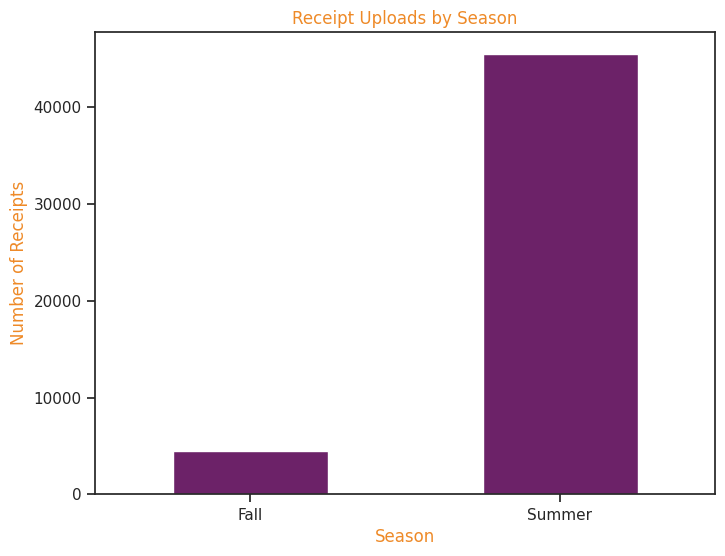

In [248]:
# Seasonal analysis of receipt uploads.identify is if users upload receipts more during winter, fall, spring or summer.
import matplotlib.pyplot as plt

# Convert 'SCAN_DATE' to datetime objects
transactions['SCAN_DATE'] = pd.to_datetime(transactions['SCAN_DATE'])

# Extract month and year
transactions['Month'] = transactions['SCAN_DATE'].dt.month
transactions['Year'] = transactions['SCAN_DATE'].dt.year

# Define seasons based on months
transactions['Season'] = 'Unknown'
transactions.loc[transactions['Month'].isin([12, 1, 2]), 'Season'] = 'Winter'
transactions.loc[transactions['Month'].isin([3, 4, 5]), 'Season'] = 'Spring'
transactions.loc[transactions['Month'].isin([6, 7, 8]), 'Season'] = 'Summer'
transactions.loc[transactions['Month'].isin([9, 10, 11]), 'Season'] = 'Fall'

# Group by season and count receipts
seasonal_counts = transactions.groupby('Season')['RECEIPT_ID'].count()

# Visualize the seasonal distribution
plt.figure(figsize=(8, 6))
seasonal_counts.plot(kind='bar',color="#6c2268")
plt.title('Receipt Uploads by Season',color="#ee8a28")
plt.xlabel('Season', color="#ee8a28")
plt.ylabel('Number of Receipts', color="#ee8a28")
plt.xticks(rotation=0)
plt.show()


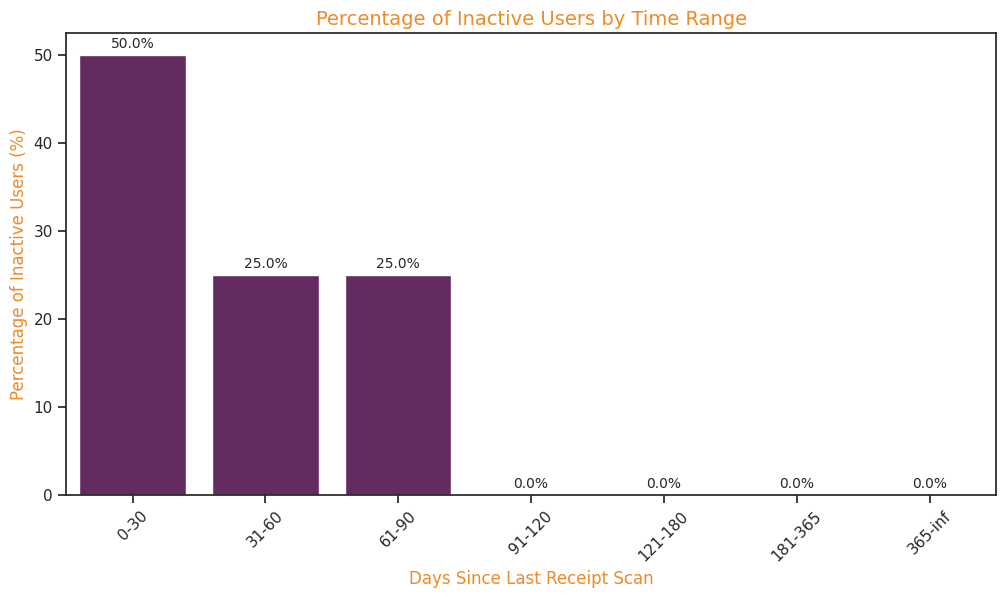

In [250]:
# Ensure 'SCAN_DATE' is in datetime format
merged_prod_users_transaction["SCAN_DATE"] = pd.to_datetime(merged_prod_users_transaction["SCAN_DATE"])

# Get the most recent scan date for reference
latest_scan_date = merged_prod_users_transaction["SCAN_DATE"].max()

# Calculate inactivity period (days since last scan date) per user
user_last_scan = merged_prod_users_transaction.groupby("USER_ID")["SCAN_DATE"].max().reset_index()
user_last_scan["DaysSinceLastPurchase"] = (latest_scan_date - user_last_scan["SCAN_DATE"]).dt.days

# Define inactivity time ranges
time_ranges = [(0, 30), (31, 60), (61, 90), (91, 120), (121, 180), (181, 365), (365, float('inf'))]

# Categorize users into inactivity ranges
user_last_scan['InactivityRange'] = pd.cut(
    user_last_scan['DaysSinceLastPurchase'],
    bins=[r[0] for r in time_ranges] + [float('inf')],
    labels=[f'{r[0]}-{r[1]}' for r in time_ranges],
    right=False, include_lowest=True
)

# Calculate the percentage of users in each inactivity range
inactivity_percentages = user_last_scan['InactivityRange'].value_counts(normalize=True) * 100

# Create the bar chart using the specified color theme (#ee8a28)
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=inactivity_percentages.index, y=inactivity_percentages.values, color="#6c2268")
plt.xlabel('Days Since Last Receipt Scan', fontsize=12, color="#ee8a28")
plt.ylabel('Percentage of Inactive Users (%)', fontsize=12,color="#ee8a28")
plt.title('Percentage of Inactive Users by Time Range', fontsize=14,color="#ee8a28")

# Add percentage labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.show()
